In [1]:
%matplotlib widget 

In [1]:

import pdb
import numpy as np

import json
import os
import re
import csv

def extract_numeric_part(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    return float('inf')

def find_indices(list_to_check, item_to_find):
    array = np.array(list_to_check)
    indices = np.where(array == item_to_find)[0]
    return list(indices)
    
single_pth='/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122'
prefix='auto'
data_list=[]
for dir_pth in os.listdir(single_pth):
    if os.path.isdir(os.path.join(single_pth, dir_pth)) is False:
        continue
    if dir_pth != '3p0_9':
        data_list.append(dir_pth)

sorted_data_list = sorted(data_list)

dataset_list= sorted_data_list
#single_num=len(sorted_data_list)
single_num=len(data_list)
print(dataset_list)


for dir_pth in (dataset_list):
    final_result=[['method','ZN_A:ZN405','ZN_B:ZN405','ZN_C:ZN405','ZN_D:ZN405','ZN_E:ZN405','ZN_F:ZN405','ZN_G:ZN405','ZN_H:ZN405','ZN_I:ZN405','ZN_J:ZN405','ZN_K:ZN405','ZN_L:ZN405','SD_A:MET205', 'SD_B:MET205', 'SD_C:MET205', 'SD_D:MET205', 'SD_E:MET205', 'SD_F:MET205', 'SD_G:MET205', 'SD_H:MET205', 'SD_I:MET205', 'SD_J:MET205', 'SD_K:MET205', 'SD_L:MET205', 'SD_A:MET120', 'SD_B:MET120', 'SD_C:MET120', 'SD_D:MET120', 'SD_E:MET120', 'SD_F:MET120', 'SD_G:MET120', 'SD_H:MET120','SD_I:MET120', 'SD_J:MET120', 'SD_K:MET120', 'SD_L:MET120']]
    counter=0
    atoms_to_find = final_result[0][1:]

    for target in ['acsh','sh', 'ac']:
        
        i = dataset_list.index(dir_pth)
        try:
            if i < single_num:
                with open(os.path.join( single_pth ,dir_pth ,'dimple',target,'anode.lsa'), 'r') as file:
                    lines = file.readlines()

        except:
            continue
            
        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '          X        Y        Z   Height(sig)  SOF     Nearest atom' in line:
                start_index = i + 2#1
                
            elif 'Peaks output to file' in line:
                end_index = i - 1
                
        print(f'{dir_pth}, {target}')
        
        table_data = []
        atom_list = []
        peak_list = []
        for line in lines[start_index:end_index]:
            #print(line)
            
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()
            atom_list.append(columns[-1])
            peak_list.append(columns[4])

            # Convert the columns to floats
            row_data = [col for col in columns]
            table_data.append(row_data)
        
        # Convert the table data to a NumPy array
        #table_array = np.array(table_data)
        row=[f'method:{target}:']

        for label in atoms_to_find:

            if atom_list.count(label) > 1:
                indexes = (np.where(np.array(atom_list) == label))[0]#.tolist()
                #duplicate_peaks = peak_list[atom_list.index('ZN_C:ZN405')]
                duplicate_peaks = np.array(peak_list)[indexes]
                duplicate_peaks = np.asarray(duplicate_peaks, dtype=float)
                max_peak = np.max((duplicate_peaks))
                row.append(str(max_peak))

            elif atom_list.count(label) == 1:
                row.append(peak_list[atom_list.index(label)])
            
            elif any(atom == label for atom in atom_list) == False:
                row.append('nan')

        final_result.append(row)

        dataset_filename = f'{dir_pth}.csv'.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file)
            for r in final_result:
                writer.writerow(r)
        dataset_file.close()


['anacor', 'dimple', 'just_dials', 'plotting_results']


           method set_id        label  value
0    method:acsh:  Set 1   ZN_A:ZN405  15.58
1      method:sh:  Set 1   ZN_A:ZN405  13.77
2      method:ac:  Set 1   ZN_A:ZN405  12.55
3    method:acsh:  Set 2   ZN_A:ZN405  10.22
4      method:sh:  Set 2   ZN_A:ZN405   7.83
5      method:ac:  Set 2   ZN_A:ZN405   7.63
6    method:acsh:  Set 3   ZN_A:ZN405  13.72
7      method:sh:  Set 3   ZN_A:ZN405  10.55
8      method:ac:  Set 3   ZN_A:ZN405  10.11
9    method:acsh:  Set 4   ZN_A:ZN405  14.16
10     method:sh:  Set 4   ZN_A:ZN405  11.96
11     method:ac:  Set 4   ZN_A:ZN405  12.20
144  method:acsh:  Set 1  SD_A:MET205  10.08
145    method:sh:  Set 1  SD_A:MET205   9.26
146    method:ac:  Set 1  SD_A:MET205   8.95
147  method:acsh:  Set 2  SD_A:MET205   9.43
148    method:sh:  Set 2  SD_A:MET205   7.07
149    method:ac:  Set 2  SD_A:MET205   8.29
150  method:acsh:  Set 3  SD_A:MET205  11.35
151    method:sh:  Set 3  SD_A:MET205   9.54
152    method:ac:  Set 3  SD_A:MET205   9.76
153  metho

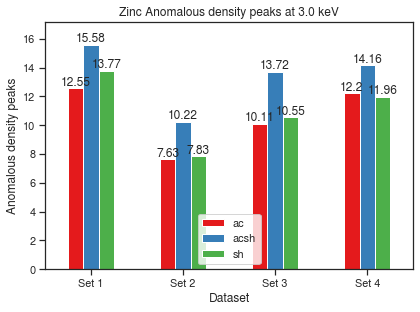

2


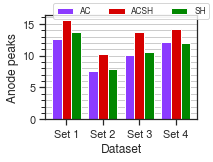

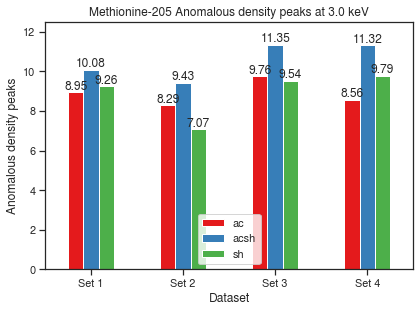

3


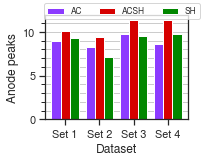

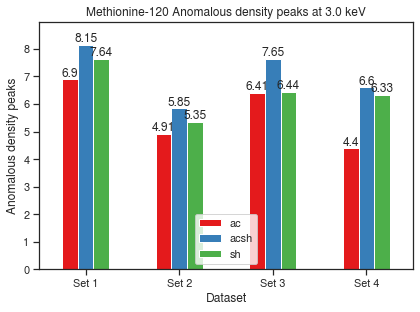

[[10.622499999999999, 8.89, 5.654999999999999], [13.420000000000002, 10.545, 7.0625], [11.027500000000002, 8.915, 6.4399999999999995]]


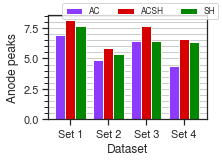

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p0_10.csv',  # original file
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p0_11.csv', # hypothetical additional files
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p0_12.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p0_16.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']
method_to_marker = ['o', 's', '^']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])
print(filtered_combined_data)

#Zn_plot = filtered_combined_data[filtered_combined_data['label']=='ZN_A:ZN405']
Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]

final_averages = [[], [], []]
i = 0
for atom in [Zn_plot, M205_plot, M120_plot]:
    i +=1
    print(i)
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

    sns.set(palette='Set1', style='ticks') # Set2
    plt.rcParams['font.family'] = 'Nimbus Sans'
    ax = pd.DataFrame({'ac':list(ac['value']), 'acsh':list(acsh['value']), 'sh':list(sh['value'])}, index=list(ac['set_id']))
    ax = ax.plot(kind='bar', legend=True, figsize=(6,4.5))
    for container in ax.containers:
        ax.bar_label(container)
    lim = ax.get_ylim()
    ax.set_ylim(lim[0], lim[1]*1.05)
    ax.legend(loc='lower center')
    #plt.title('Anomalous density peaks at 3000 keV ')
    plt.xticks(rotation = 0)
    plt.xlabel('Dataset')
    plt.ylabel('Anomalous density peaks')
    if i ==1:
        plt.title('Zinc Anomalous density peaks at 3.0 keV')
        plt.tight_layout()
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p0_zn405_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p0_zn405_peaks.png', dpi=300)
    if i ==2:
        plt.title('Methionine-205 Anomalous density peaks at 3.0 keV')
        plt.tight_layout()
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p0_met205_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p0_met205_peaks.png', dpi=300)
    if i ==3:
        plt.title('Methionine-120 Anomalous density peaks at 3.0 keV')
        plt.tight_layout()
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p0_met120_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p0_met120_peaks.png', dpi=300)
    plt.show()


    n = len(file_paths)
    
    #fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
    fig, ax = plt.subplots(figsize=(3,2.3))
    data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
    bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
    #ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
    ax.set_xticks([0,1,2,3])
    #ax1.set_xticks(list(np.arange(n-1)))
    ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
    ax.set_ylabel("Anode peaks")
    ax.set_xlabel("Dataset")
    fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    ax.grid(axis='y', which='both')
    
    fig.tight_layout()
    if i == 1:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p0_zinc.pdf')
    if i == 2:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p0_met250.pdf')
    if i == 3:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p0_met120.pdf')

print(final_averages)


          method set_id       label  value
0   method:acsh:  Set 1  ZN_A:ZN405  11.79
1     method:sh:  Set 1  ZN_A:ZN405   9.96
2     method:ac:  Set 1  ZN_A:ZN405  10.16
3   method:acsh:  Set 2  ZN_A:ZN405  13.89
4     method:sh:  Set 2  ZN_A:ZN405  10.67
5     method:ac:  Set 2  ZN_A:ZN405  11.61
6   method:acsh:  Set 3  ZN_A:ZN405  11.95
7     method:sh:  Set 3  ZN_A:ZN405  10.64
8     method:ac:  Set 3  ZN_A:ZN405  10.66
9   method:acsh:  Set 4  ZN_A:ZN405  11.36
10    method:sh:  Set 4  ZN_A:ZN405   9.42
11    method:ac:  Set 4  ZN_A:ZN405   9.60
12  method:acsh:  Set 5  ZN_A:ZN405   9.72
13    method:sh:  Set 5  ZN_A:ZN405   8.04
14    method:ac:  Set 5  ZN_A:ZN405   7.90


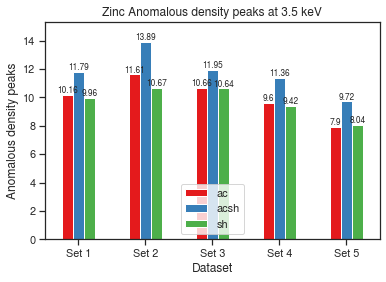

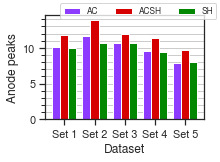

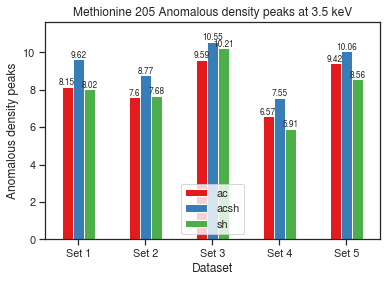

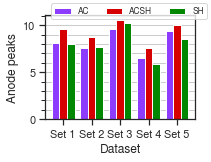

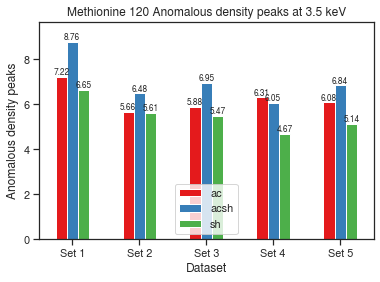

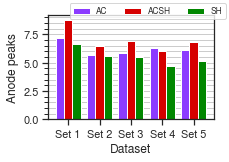

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

cwd = os.getcwd()

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p5_1.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p5_2.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p5_3.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p5_4.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p5_5.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']
#method_to_marker = ['o', 's', '^']

method_colors = sns.color_palette("Set1", n_colors=3)

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])

#Zn_plot = filtered_combined_data[filtered_combined_data['label']=='ZN_A:ZN405']
Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]
print(Zn_plot)
i = 0
for atom in [Zn_plot, M205_plot, M120_plot]:
    i += 1
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    sns.set(palette='Set1', style='ticks') # Set2
    plt.rcParams['font.family'] = 'Nimbus Sans'
    ax = pd.DataFrame({'ac':list(ac['value']), 'acsh':list(acsh['value']), 'sh':list(sh['value'])}, index=list(ac['set_id']))
    ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
    lim = ax.get_ylim()
    ax.set_ylim(lim[0], lim[1]*1.05)
    ax.legend(loc='lower center')
    plt.xlabel('Dataset')
    plt.ylabel('Anomalous density peaks')
    plt.xticks(rotation = 0)
    for container in ax.containers:
        ax.bar_label(container, fontsize='x-small')
    
    if i ==1:
        plt.title('Zinc Anomalous density peaks at 3.5 keV')
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p5_zn405_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p5_zn405_peaks.png', dpi=300)
    if i ==2:
        plt.title('Methionine 205 Anomalous density peaks at 3.5 keV')
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p5_met205_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p5_met205_peaks.png', dpi=300)
    if i ==3:
        plt.title('Methionine 120 Anomalous density peaks at 3.5 keV')
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p5_met120_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p5_met120_peaks.png', dpi=300)
    plt.show()


    
    n = len(file_paths)
    
    #fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
    fig, ax = plt.subplots(figsize=(3.1,2.3))
    data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
    bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
    #ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
    ax.set_xticks([0,1,2,3,4])
    #ax1.set_xticks(list(np.arange(n-1)))
    ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
    ax.set_ylabel("Anode peaks")
    ax.set_xlabel("Dataset")
    fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    ax.grid(axis='y', which='both')
    
    fig.tight_layout()
    if i == 1:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p5_zinc.pdf')
    if i == 2:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p5_met250.pdf')
    if i == 3:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p5_met120.pdf')


           method set_id        label  value
0    method:acsh:  Set 1   ZN_A:ZN405  12.26
1      method:sh:  Set 1   ZN_A:ZN405   9.98
2      method:ac:  Set 1   ZN_A:ZN405  10.85
3    method:acsh:  Set 2   ZN_A:ZN405  11.83
4      method:sh:  Set 2   ZN_A:ZN405  10.58
5      method:ac:  Set 2   ZN_A:ZN405  10.67
6    method:acsh:  Set 3   ZN_A:ZN405  14.23
7      method:sh:  Set 3   ZN_A:ZN405  13.61
8      method:ac:  Set 3   ZN_A:ZN405  12.97
9    method:acsh:  Set 4   ZN_A:ZN405   8.79
10     method:sh:  Set 4   ZN_A:ZN405   6.71
11     method:ac:  Set 4   ZN_A:ZN405   8.00
12   method:acsh:  Set 5   ZN_A:ZN405  11.50
13     method:sh:  Set 5   ZN_A:ZN405   9.67
14     method:ac:  Set 5   ZN_A:ZN405  10.50
180  method:acsh:  Set 1  SD_A:MET205  10.69
181    method:sh:  Set 1  SD_A:MET205   8.42
182    method:ac:  Set 1  SD_A:MET205   9.72
183  method:acsh:  Set 2  SD_A:MET205   9.82
184    method:sh:  Set 2  SD_A:MET205   7.13
185    method:ac:  Set 2  SD_A:MET205   8.15
186  metho

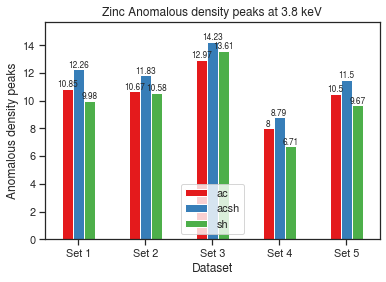

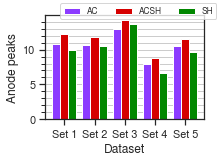

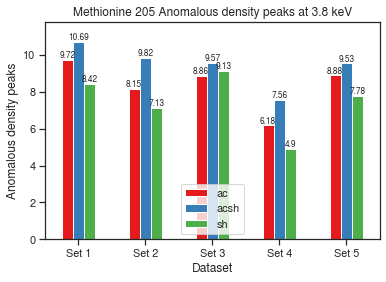

       method set_id        label  value
0  method:sh:  Set 1  SD_A:MET120   6.46
1  method:sh:  Set 2  SD_A:MET120   7.83
4  method:sh:  Set 3  SD_A:MET120   0.00
2  method:sh:  Set 4  SD_A:MET120   4.65
3  method:sh:  Set 5  SD_A:MET120   6.08


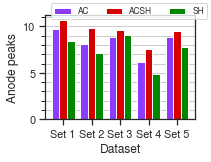

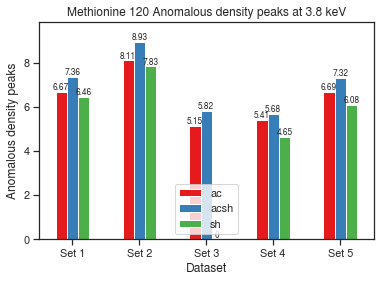

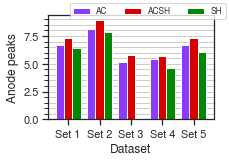

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p8_1.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p8_2.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p8_3.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p8_4.csv',
    '/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/3p8_5.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']
method_to_marker = ['o', 's', '^']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])
print(filtered_combined_data)

Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]

final_averages = [[], [], []]

print(M120_plot[M120_plot['method']=='method:sh:'])
i = 0
for atom in [Zn_plot, M205_plot, M120_plot]:
    i += 1
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    #final_averages[0].append(np.average(ac['value']))
    #final_averages[1].append(np.average(acsh['value']))
    #final_averages[2].append(np.average(sh['value']))
    
    if len(sh) != 5:
        empty_line = pd.DataFrame([{'method':'method:sh:', 'set_id': 'Set 3', 'label':'SD_A:MET120', 'value':0}])
        sh = pd.concat([sh, empty_line], ignore_index=True)
        sh = sh.sort_values(by='set_id')
        print(sh)

    sns.set(palette='Set1', style='ticks') # Set2
    plt.rcParams['font.family'] = 'Nimbus Sans'
    ax = pd.DataFrame({'ac':list(ac['value']), 'acsh':list(acsh['value']), 'sh':list(sh['value'])}, index=list(ac['set_id']))
    ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
    lim = ax.get_ylim()
    ax.set_ylim(lim[0], lim[1]*1.05)
    ax.legend(loc='lower center')
    for container in ax.containers:
        ax.bar_label(container, fontsize='x-small')
    if i ==1:
        plt.title('Zinc Anomalous density peaks at 3.8 keV')
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p8_zn405_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p8_zn405_peaks.png', dpi=300)
    if i ==2:
        plt.title('Methionine 205 Anomalous density peaks at 3.8 keV')
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p8_met205_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p8_met205_peaks.png', dpi=300)
    if i ==3:
        plt.title('Methionine 120 Anomalous density peaks at 3.8 keV')
        plt.savefig('/dls/i23/data/2023/cm33851-5/processing/anacor/tlys_9/P6122/plotting_results/plots/3p8_met120_peaks.png')
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p8_met120_peaks.png', dpi=300)
    plt.xlabel('Dataset')
    plt.ylabel('Anomalous density peaks')
    plt.xticks(rotation = 0)
    plt.show()

    n = len(file_paths)
    
    #fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
    fig, ax = plt.subplots(figsize=(3.1,2.3))
    data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
    bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
    #ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
    ax.set_xticks([0,1,2,3,4])
    #ax1.set_xticks(list(np.arange(n-1)))
    ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
    ax.set_ylabel("Anode peaks")
    ax.set_xlabel("Dataset")
    fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    ax.grid(axis='y', which='both')
    
    fig.tight_layout()
    if i == 1:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p8_zinc.pdf')
    if i == 2:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p8_met250.pdf')
    if i == 3:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/3p8_met120.pdf')

In [3]:
import colorcet as cc

def bar_plot(ax, data, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]], total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
    if legend==False:
        return bars

In [5]:

import pdb
import numpy as np

import json
import os
import re
import csv
    
single_pth='/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dimple_so4'
prefix='auto'
data_list=[]
for dir_pth in os.listdir(single_pth):
    if os.path.isdir(os.path.join(single_pth, dir_pth)) is False:
        continue
    
    data_list.append(dir_pth)

sorted_data_list = sorted(data_list)

dataset_list= sorted_data_list
#single_num=len(sorted_data_list)
single_num=len(data_list)
print(dataset_list)


for dir_pth in (dataset_list):#'SD_A:MET122', 
    final_result=[['energy', 'method', 'ZN_A:ZN405','ZN_B:ZN405','ZN_C:ZN405','ZN_D:ZN405','ZN_E:ZN405','ZN_F:ZN405','ZN_G:ZN405','ZN_H:ZN405','ZN_I:ZN405','ZN_J:ZN405','ZN_K:ZN405','ZN_L:ZN405','SD_A:MET205', 'SD_B:MET205', 'SD_C:MET205', 'SD_D:MET205', 'SD_E:MET205', 'SD_F:MET205', 'SD_G:MET205', 'SD_H:MET205', 'SD_I:MET205', 'SD_J:MET205', 'SD_K:MET205', 'SD_L:MET205', 'SD_A:MET120', 'SD_B:MET120', 'SD_C:MET120', 'SD_D:MET120', 'SD_E:MET120', 'SD_F:MET120', 'SD_G:MET120', 'SD_H:MET120','SD_I:MET120', 'SD_J:MET120', 'SD_K:MET120', 'SD_L:MET120', 'O2_B:SO41']]
    final_result=[['energy', 'method', 'ZN_A:ZN405', 'SD_A:MET205', 'SD_A:MET120', 'O2_B:SO41']]
    counter=0
    atoms_to_find = final_result[0][2:]

    for target in ['acsh','sh', 'ac']:
        i = dataset_list.index(dir_pth)
        #try:
            #if i < single_num:
        with open(os.path.join(single_pth, dir_pth, target, 'anode.lsa'), 'r') as file:
            lines = file.readlines()

        #except:
            #continue
            
        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '          X        Y        Z   Height(sig)  SOF     Nearest atom' in line:
                start_index = i + 2#1
                
            elif 'Peaks output to file' in line:
                end_index = i - 1
                
        print(f'{dir_pth}, {target}')
        
        table_data = []
        atom_list = []
        peak_list = []
        for line in lines[start_index:end_index]:
            
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()
            atom_list.append(columns[-1])
            peak_list.append(columns[4])

            # Convert the columns to floats
            row_data = [col for col in columns]
            table_data.append(row_data)
        
        # Convert the table data to a NumPy array
        #table_array = np.array(table_data)
        row=[f'{dir_pth}']
        row.append(f':{target}:')

        for label in atoms_to_find:

            if atom_list.count(label) > 1:
                indexes = (np.where(np.array(atom_list) == label))[0]#.tolist()
                #duplicate_peaks = peak_list[atom_list.index('ZN_C:ZN405')]
                duplicate_peaks = np.array(peak_list)[indexes]
                duplicate_peaks = np.asarray(duplicate_peaks, dtype=float)
                max_peak = np.max((duplicate_peaks))
                print(max_peak)
                row.append(str(max_peak))

            elif atom_list.count(label) == 1:
                row.append(peak_list[atom_list.index(label)])
            
            elif any(atom == label for atom in atom_list) == False:
                row.append('nan')

        final_result.append(row)

        dataset_filename = f'/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/{dir_pth}_so4_peaks.csv'.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file)
            for r in final_result:
                writer.writerow(r)
        #dataset_file.close()


['3p0', '3p5', '3p8']
3p0, acsh
3p0, sh
3p0, ac
3p5, acsh
3p5, sh
17.7
3p5, ac
3p8, acsh
3p8, sh
3p8, ac


  energy  method  ZN_A:ZN405  SD_A:MET205  SD_A:MET120  O2_B:SO41
0    3p0  :acsh:       18.51        14.16         9.84       6.05
1    3p0    :sh:       17.15        12.58         9.49       7.25
2    3p0    :ac:       17.72        13.85         8.60       6.06
0    3p5  :acsh:       18.48        14.36        11.30       7.09
1    3p5    :sh:       17.70        14.28        10.45       8.27
2    3p5    :ac:       16.99        13.96        10.77       7.62
0    3p8  :acsh:       20.67        15.90        11.09       7.15
1    3p8    :sh:       20.08        15.17        11.33       6.50
2    3p8    :ac:       19.33        15.21        10.49       6.45
   energy  method        label  value
0     3p0  :acsh:   ZN_A:ZN405  18.51
1     3p0    :sh:   ZN_A:ZN405  17.15
2     3p0    :ac:   ZN_A:ZN405  17.72
3     3p5  :acsh:   ZN_A:ZN405  18.48
4     3p5    :sh:   ZN_A:ZN405  17.70
5     3p5    :ac:   ZN_A:ZN405  16.99
6     3p8  :acsh:   ZN_A:ZN405  20.67
7     3p8    :sh:   ZN_A:ZN405  20.0

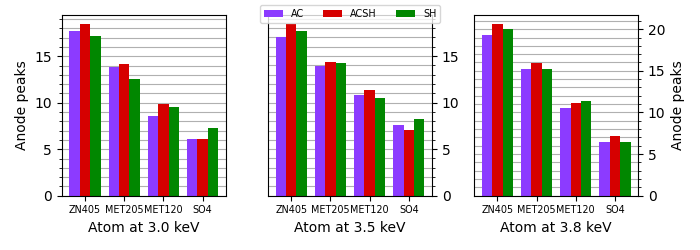

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p0_so4_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p5_so4_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p8_so4_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    #df['energy'] = f"{energy_list[i-1]}"  # Adding a set identifier
    atoms = df.columns[2:].to_list()
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['energy', 'method'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])
data = melted_combined_data
print(data)

ac = data[data['method']==':ac:']
acsh = data[data['method']==':acsh:']
sh = data[data['method']==':sh:']


n = len(atoms_to_find)
print(n)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(7,2.5))


data1 = data[data['energy']=='3p0']
ac = data1[data1['method']==':ac:']
acsh = data1[data1['method']==':acsh:']
sh = data1[data1['method']==':sh:']

data1 = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars1 = bar_plot(ax1, data1, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1,2,3])
#ax1.set_xticks(list(np.arange(n-1)))
ax1.set_xticklabels([list(ac['label'])[i].split(':')[-1].replace('SO41','SO4') for i in range(n)], fontsize='x-small')
ax1.set_ylabel("Anode peaks")
ax1.set_xlabel("Atom at 3.0 keV")


data2 = data[data['energy']=='3p5']
ac = data2[data2['method']==':ac:']
acsh = data2[data2['method']==':acsh:']
sh = data2[data2['method']==':sh:']

data2 = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1,2,3])
#ax2.set_xticks(list(np.arange(n-1)))
ax2.set_xticklabels([list(ac['label'])[i].split(':')[-1].replace('SO41','SO4') for i in range(n)], fontsize='x-small')
#ax2.set_ylabel("Anode peaks")
ax2.set_xlabel("Atom at 3.5 keV")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')


data3 = data[data['energy']=='3p8']
ac = data3[data3['method']==':ac:']
acsh = data3[data3['method']==':acsh:']
sh = data3[data3['method']==':sh:']

data3 = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars3 = bar_plot(ax3, data3, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax3.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax3.set_xticks([0,1,2,3])
#ax1.set_xticks(list(np.arange(n-1)))
ax3.set_xticklabels([list(ac['label'])[i].split(':')[-1].replace('SO41','SO4') for i in range(n)], fontsize='x-small')
ax3.set_ylabel("Anode peaks")
ax3.set_xlabel("Atom at 3.8 keV")
ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')


fig.legend(bars1, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
ax3.grid(axis='y', which='both')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax3.set_axisbelow(True)
fig.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dimple_so4/merged_peaks.pdf')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/merged_peaks_so4.pdf')
plt.show()

In [ ]:
# No SO4

In [13]:

import pdb
import numpy as np

import json
import os
import re
import csv
    
single_pth='/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dimple'
prefix='auto'
data_list=[]
for dir_pth in os.listdir(single_pth):
    if os.path.isdir(os.path.join(single_pth, dir_pth)) is False:
        continue
    
    data_list.append(dir_pth)

sorted_data_list = sorted(data_list)

dataset_list= sorted_data_list
#single_num=len(sorted_data_list)
single_num=len(data_list)
print(dataset_list)


for dir_pth in (dataset_list):#'SD_A:MET122', 
    final_result=[['energy', 'method', 'ZN_A:ZN405','ZN_B:ZN405','ZN_C:ZN405','ZN_D:ZN405','ZN_E:ZN405','ZN_F:ZN405','ZN_G:ZN405','ZN_H:ZN405','ZN_I:ZN405','ZN_J:ZN405','ZN_K:ZN405','ZN_L:ZN405','SD_A:MET205', 'SD_B:MET205', 'SD_C:MET205', 'SD_D:MET205', 'SD_E:MET205', 'SD_F:MET205', 'SD_G:MET205', 'SD_H:MET205', 'SD_I:MET205', 'SD_J:MET205', 'SD_K:MET205', 'SD_L:MET205', 'SD_A:MET120', 'SD_B:MET120', 'SD_C:MET120', 'SD_D:MET120', 'SD_E:MET120', 'SD_F:MET120', 'SD_G:MET120', 'SD_H:MET120','SD_I:MET120', 'SD_J:MET120', 'SD_K:MET120', 'SD_L:MET120', 'O2_B:SO41']]
    final_result=[['energy', 'method', 'ZN_A:ZN405', 'SD_A:MET205', 'SD_A:MET120']]
    counter=0
    atoms_to_find = final_result[0][2:]

    for target in ['acsh','sh', 'ac']:
        i = dataset_list.index(dir_pth)
        #try:
            #if i < single_num:
        with open(os.path.join(single_pth, dir_pth, target, 'anode.lsa'), 'r') as file:
            lines = file.readlines()

        #except:
            #continue
            
        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '          X        Y        Z   Height(sig)  SOF     Nearest atom' in line:
                start_index = i + 2#1
                
            elif 'Peaks output to file' in line:
                end_index = i - 1
                
        print(f'{dir_pth}, {target}')
        
        table_data = []
        atom_list = []
        peak_list = []
        for line in lines[start_index:end_index]:
            
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()
            atom_list.append(columns[-1])
            peak_list.append(columns[4])

            # Convert the columns to floats
            row_data = [col for col in columns]
            table_data.append(row_data)
        
        # Convert the table data to a NumPy array
        #table_array = np.array(table_data)
        row=[f'{dir_pth}']
        row.append(f':{target}:')

        for label in atoms_to_find:

            if atom_list.count(label) > 1:
                indexes = (np.where(np.array(atom_list) == label))[0]#.tolist()
                #duplicate_peaks = peak_list[atom_list.index('ZN_C:ZN405')]
                duplicate_peaks = np.array(peak_list)[indexes]
                duplicate_peaks = np.asarray(duplicate_peaks, dtype=float)
                max_peak = np.max((duplicate_peaks))
                print(max_peak)
                row.append(str(max_peak))

            elif atom_list.count(label) == 1:
                row.append(peak_list[atom_list.index(label)])
            
            elif any(atom == label for atom in atom_list) == False:
                row.append('nan')

        final_result.append(row)

        dataset_filename = f'/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/{dir_pth}_peaks.csv'.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file)
            for r in final_result:
                writer.writerow(r)
        #dataset_file.close()


['3p0', '3p5', '3p8']
3p0, acsh
3p0, sh
3p0, ac
3p5, acsh
3p5, sh
3p5, ac
3p8, acsh
3p8, sh
3p8, ac


  energy  method  ZN_A:ZN405  SD_A:MET205  SD_A:MET120
0    3p0  :acsh:       18.14        14.18         9.78
1    3p0    :sh:       17.04        12.68         9.46
2    3p0    :ac:       17.50        13.77         8.60
0    3p5  :acsh:       18.24        14.06        11.15
1    3p5    :sh:       17.48        13.94        10.34
2    3p5    :ac:       16.75        13.68        10.76
0    3p8  :acsh:       20.68        16.04        10.68
1    3p8    :sh:       20.09        14.89        10.97
2    3p8    :ac:       19.26        15.33        10.24
   energy  method        label  value
0     3p0  :acsh:   ZN_A:ZN405  18.14
1     3p0    :sh:   ZN_A:ZN405  17.04
2     3p0    :ac:   ZN_A:ZN405  17.50
3     3p5  :acsh:   ZN_A:ZN405  18.24
4     3p5    :sh:   ZN_A:ZN405  17.48
5     3p5    :ac:   ZN_A:ZN405  16.75
6     3p8  :acsh:   ZN_A:ZN405  20.68
7     3p8    :sh:   ZN_A:ZN405  20.09
8     3p8    :ac:   ZN_A:ZN405  19.26
9     3p0  :acsh:  SD_A:MET205  14.18
10    3p0    :sh:  SD_A:MET205  

IndexError: list index out of range

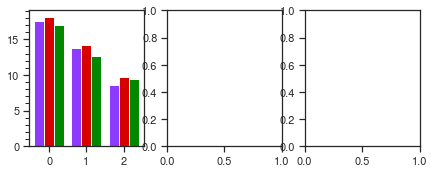

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p0_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p5_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p8_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    #df['energy'] = f"{energy_list[i-1]}"  # Adding a set identifier
    atoms = df.columns[2:].to_list()
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['energy', 'method'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])
data = melted_combined_data
print(data)

ac = data[data['method']==':ac:']
acsh = data[data['method']==':acsh:']
sh = data[data['method']==':sh:']


n = len(atoms_to_find)
print(n)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(7,2.5))


data1 = data[data['energy']=='3p0']
ac = data1[data1['method']==':ac:']
acsh = data1[data1['method']==':acsh:']
sh = data1[data1['method']==':sh:']

data1 = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars1 = bar_plot(ax1, data1, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax1.set_xticklabels([list(ac['label'])[i].split(':')[-1] for i in range(n)], fontsize='x-small')
ax1.set_ylabel("Anode peaks")
ax1.set_xlabel("Atom at 3.0 keV")


data2 = data[data['energy']=='3p5']
ac = data2[data2['method']==':ac:']
acsh = data2[data2['method']==':acsh:']
sh = data2[data2['method']==':sh:']

data2 = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1,2])
#ax2.set_xticks(list(np.arange(n-1)))
ax2.set_xticklabels([list(ac['label'])[i].split(':')[-1] for i in range(n)], fontsize='x-small')
#ax2.set_ylabel("Anode peaks")
ax2.set_xlabel("Atom at 3.5 keV")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')


data3 = data[data['energy']=='3p8']
ac = data3[data3['method']==':ac:']
acsh = data3[data3['method']==':acsh:']
sh = data3[data3['method']==':sh:']

data3 = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars3 = bar_plot(ax3, data3, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax3.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax3.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax3.set_xticklabels([list(ac['label'])[i].split(':')[-1] for i in range(n)], fontsize='x-small')
ax3.set_ylabel("Anode peaks")
ax3.set_xlabel("Atom at 3.8 keV")
ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')


fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
ax3.grid(axis='y', which='both')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax3.set_axisbelow(True)
fig.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dimple/merged_peaks.pdf')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/peaks/merged_peaks.pdf')
plt.show()